In [182]:
import numpy as np

# import load_iris function from dataset module
from sklearn.datasets import load_iris


In [183]:
# save "Bunch" object containing iris dataset and attributes
iris = load_iris()
type(iris)


sklearn.utils.Bunch

In [184]:
print(type(iris.data))
data = iris.data


<class 'numpy.ndarray'>


In [185]:
iris.data.shape

(150, 4)

In [186]:
feature_names = iris.feature_names


In [187]:
target = iris.target


In [188]:
target_names = iris.target_names


In [189]:
# import the knn classifier
from sklearn.neighbors import KNeighborsClassifier

# make an instance of the model (estimator)
knn1 = KNeighborsClassifier(n_neighbors=1)

# train the model - fit the model with the data
knn1.fit(data, target)


KNeighborsClassifier(n_neighbors=1)

In [190]:
# predict the response of a new observations (out of sample data)
knn1.predict([[3, 5, 3, 2]])


array([0])

In [191]:
# same for muliple new observations
knn1.predict([[3, 5, 4, 2], [5, 4, 3, 2]])


array([2, 1])

In [192]:
## use a different value for k

# make an instance of the model (estimator)
knn5 = KNeighborsClassifier(n_neighbors=5)

# train the model - fit the model with the data
knn5.fit(data, target)

KNeighborsClassifier()

In [193]:
# predict the response of a new observations (out of sample data)
knn5.predict([[3, 5, 3, 2]])


array([0])

In [194]:
# same for muliple new observations
knn5.predict([[3, 5, 4, 2], [5, 4, 3, 2]])


array([1, 1])

In [195]:
## use another classifier - logistic regression

# import the logistic regression classifier
from sklearn.linear_model import LogisticRegression

# make an instance of the model (estimator)
logReg = LogisticRegression(max_iter=1_000)

# train the model - fit the model with the data
logReg.fit(data, target)


LogisticRegression(max_iter=1000)

In [196]:
# predict the response of muliple new observations
logReg.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array([0, 0])

In [197]:
### we need to evaluate our models


## logistic regression 

# generate predictions for all dataset
preds_logReg = logReg.predict(data)

# compute classification accuracy 
from sklearn import metrics
metrics.accuracy_score(target, preds_logReg)

0.9733333333333334

In [198]:
## evaluate knn (k=1) 

# generate predictions for all dataset
preds_knn1 = knn1.predict(data)

# compute classification accuracy 
metrics.accuracy_score(target, preds_knn1)

1.0

In [199]:
## evaluate knn (k=5) 

# generate predictions for all dataset
preds_knn5 = knn5.predict(data)

# compute classification accuracy 
metrics.accuracy_score(target, preds_knn5)

0.9666666666666667

In [200]:
# to overcome over-fitting, split data to test and train sets

# split into testing and training sets
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4)

In [201]:
## train the model on the training set

# make an instance of the model (estimator)
logReg = LogisticRegression(max_iter=1_000)

# train the model - fit the model with the data
logReg.fit(data_train, target_train)

# generate predictions for testing set
preds_logReg = logReg.predict(data_test)

# compute classification accuracy 
metrics.accuracy_score(target_test, preds_logReg)

0.95

In [202]:
## same for knn (k=1)

# make an instance of the model (estimator)
knn1 = KNeighborsClassifier(n_neighbors=1)

# train the model - fit the model with the data
knn1.fit(data_train, target_train)

# generate predictions for testing set
preds_knn1 = knn1.predict(data_test)

# compute classification accuracy 
metrics.accuracy_score(target_test, preds_knn1)

0.9

In [203]:
## same for knn (k=1)

# make an instance of the model (estimator)
knn5 = KNeighborsClassifier(n_neighbors=5)

# train the model - fit the model with the data
knn5.fit(data_train, target_train)

# generate predictions for testing set
preds_knn5 = knn5.predict(data_test)

# compute classification accuracy 
metrics.accuracy_score(target_test, preds_knn5)

0.9333333333333333

In [204]:
## try k = 1 through k = 25 and record testing accuracy

accuracy_record = []

for k in range(1,25):

    # make an instance of the model (estimator)
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model - fit the model with the data
    knn.fit(data_train, target_train)

    # generate predictions for testing set
    preds_knn = knn.predict(data_test)

    # compute classification accuracy 
    acc = metrics.accuracy_score(target_test, preds_knn)
    accuracy_record.append(acc)


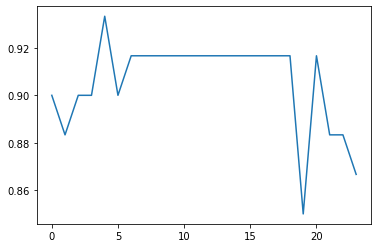

In [206]:
import matplotlib.pyplot as plt
plt.plot(accuracy_record)